<a href="https://colab.research.google.com/github/Boom-Ba/DataSciene/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DropOut Regularization 

A methodology to helps prevent overfitting, and make NN spread out its learning on more neurons.

In [23]:
# Use make_classification method to randomly generate clustering problem

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_classification
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

X,y=make_classification(n_features=2, n_classes=4, n_samples=10000, n_redundant=0, n_informative=2,random_state=7,n_clusters_per_class=1,scale=0.25)

Visualize the plot

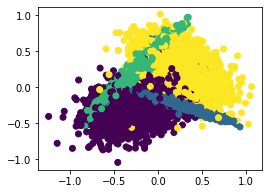

In [24]:
from pylab import *
plt.figure(figsize=(4,3))
plt.scatter(X[:,0],X[:,1],c=y.astype(np.float))
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense


In [26]:
y=keras.utils.to_categorical(y)

In [33]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=7)
print(X_train.shape, X_test.shape)

(8000, 2) (2000, 2)


In [42]:
model=Sequential() 
model.add(Dense(32, activation='relu',input_shape=X_train.shape[1:])) 
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax')) 

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                96        
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 8)                 264       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_23 (Dense)            (None, 4)                 36        
                                                                 
Total params: 396
Trainable params: 396
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
# will let model run longer to overfit, and apply dropout 
history = model.fit(X_train, y_train, batch_size=100, epochs=100, verbose=2, validation_data=(X_test,y_test))

Epoch 1/100
80/80 - 1s - loss: 1.2752 - accuracy: 0.5171 - val_loss: 1.1554 - val_accuracy: 0.7290 - 752ms/epoch - 9ms/step
Epoch 2/100
80/80 - 0s - loss: 1.0420 - accuracy: 0.6603 - val_loss: 0.8874 - val_accuracy: 0.7615 - 152ms/epoch - 2ms/step
Epoch 3/100
80/80 - 0s - loss: 0.8499 - accuracy: 0.6754 - val_loss: 0.7085 - val_accuracy: 0.7780 - 153ms/epoch - 2ms/step
Epoch 4/100
80/80 - 0s - loss: 0.7488 - accuracy: 0.6991 - val_loss: 0.6171 - val_accuracy: 0.7990 - 152ms/epoch - 2ms/step
Epoch 5/100
80/80 - 0s - loss: 0.6963 - accuracy: 0.7274 - val_loss: 0.5710 - val_accuracy: 0.8120 - 158ms/epoch - 2ms/step
Epoch 6/100
80/80 - 0s - loss: 0.6645 - accuracy: 0.7416 - val_loss: 0.5397 - val_accuracy: 0.8200 - 148ms/epoch - 2ms/step
Epoch 7/100
80/80 - 0s - loss: 0.6349 - accuracy: 0.7630 - val_loss: 0.5173 - val_accuracy: 0.8245 - 147ms/epoch - 2ms/step
Epoch 8/100
80/80 - 0s - loss: 0.6180 - accuracy: 0.7765 - val_loss: 0.5012 - val_accuracy: 0.8265 - 136ms/epoch - 2ms/step
Epoch 9/

In [41]:
scores=model.evaluate(X_test,y_test,verbose=1)
print('Test Loss:', scores[0])
print('Test Accuracy:', scores[1])

63/63 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8970
Test Loss: 0.33934691548347473
Test Accuracy: 0.8970000147819519
